A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [15]:
"""
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
"""

"\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n"

In [29]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.mnist.load_data()

In [57]:
(train_images, train_labels), (test_images, test_labels) = data

In [83]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

In [85]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [84]:
train_images.shape

(60000, 28, 28, 1)

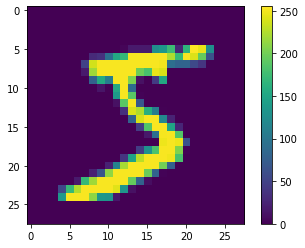

In [59]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
train_labels.shape

(60000,)

# Model 1

In [91]:
model = models.Sequential()
model.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(28, 28, 1),
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 50,618
Trainable params: 50,618
Non-trainable params: 0
_________________________________________________

In [92]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 3.1644 - accuracy: 0.5960
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4633 - accuracy: 0.8780
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2882 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2006 - accuracy: 0.9427
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1684 - accuracy: 0.9503
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1495 - accuracy: 0.9551
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1422 - accuracy: 0.9575
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1319 - accuracy: 0.9603
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1298 - accuracy: 0.9621
Epoch 10/10
1875/1875 [==============================] - 19s 10ms

In [65]:
train_images.shape

(60000, 28, 28)

In [95]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 2s - loss: 0.1069 - accuracy: 0.9708

Test accuracy: 0.97079998254776 
Loss: 0.10690663009881973


# Model 2

In [96]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(28, 28, 1),
                        padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation="sigmoid"))
model2.add(layers.Dense(32, activation="relu"))
model2.add(layers.Dense(10, activation="softmax"))
model2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                25104     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

In [97]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1903 - accuracy: 0.6245
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4771 - accuracy: 0.8562
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4248 - accuracy: 0.8673
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3842 - accuracy: 0.8815
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3796 - accuracy: 0.8835
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3496 - accuracy: 0.8932
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3354 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3454 - accuracy: 0.8934
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3287 - accuracy: 0.9006
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step

In [101]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc, "\nLoss:", test_loss)

313/313 - 2s - loss: 0.2480 - accuracy: 0.9293

Test accuracy: 0.9293000102043152 
Loss: 0.2480372041463852


Concluyendo, la capa que he metido intermedia con sigmoide, no ha mejorado la predicción de la red.